# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### Exercise 09.1

Write a C++ code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Apply your code to the optimization of a path among 

- 30 cities randomly placed **on** a circumference
- 30 cities randomly placed **inside** a square

Show your results via:

- a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm
- a picture of the best path

### DESCRIZIONE DEL CODICE

Il codice che ho sviluppato risolve l'esercizio in questo modo:

- Legge le informazione sul numero di città, la popolazione di possibili soluzioni, numero di iterazioni;
- Genera una popolazione di partenza
- per un numero di volte passato da input, misura la lunghezza del percorso per ogni individuo, quindi genera una nuova popolazione nel seguente modo:
    - riproduce in modo identico i due migliori individui
    - sostituisce la restante parte della popolazione con individui figli generati da una funzione crossover
    - al termine prova a mutare tutti gli individui eccetto il migliore della popolazione precedente
- al termine del numero di iterazioni, il codice salva le coordinate delle città nell'ordine scelto dal miglior individuo trovato

### FUNZIONI

Input(): crea l'oggetto random, legge le informazioni dal file di input, crea la configurazione di città, crea la popolazione iniziale, calcola la somma ed il prodotto dei numeri interi fino al numero di città.

GenerateCirc()/GenerateSquare(): generano la configurazione delle città secondo le due richieste dell'esercizio; sono chiamate dalla funzione Input() secondo una variabile generate passata dal file di input: se generate == 0 uso una circonferenza, altrimenti il quadrato.

StartGenetic: Genera la popolazione utilizzando una delle funzioni di mutazione, Permutation(), provandola su tutti i geni di tutti i cromosomi con probabilità del 30%, poichè parto da una popolazione di cromosomi ordinati e voglio produrne più differenze possibile.

Test(j): calcola la lunghezza del cammino per l'individuo j (in un ciclo sul numero di individui).

Ordering(): riordina la popolazione in maniera crescente rispetto alla lunghezza del cammino.

SaveData(): invocata ad ogni iterazione, per motivi di controllo mentre sviluppavo il codice, salva il miglior cammino e la sua lunghezza.

Elitarism(): copia nella nuova popolazione i due migliori individui (i primi due, dopo la chiamata di Ordering);

Place(i, j): sunzione chiamata per copiare effettivamente due nuovi individui nella nuova popolazione, poichè le tre funzioni atte alla riproduzione (ELitarism(), Crossover(), NotCrossover()) generano semplicemente due nuovi cromosomi, la funzione Place copia i due nuovi cromosomi nei posti i,j della nuova popolazione.

Selection(): seleziona due cromosomi per la riproduzione.

NotCrossover(): se non avviene crossover, i due cromosomi scelti vengono riprodotti uguali a sè stessi.

Crossover(): se avviene il crossover (probabilità del 70%), viene chiamata: sceglie un punto casuale di taglio nella prima metà del cromosoma, una lunghezza casuale al massimo della metà del cromosoma, quindi esegue il crossover su tutti gli elementi contenuti tra il punto di taglio e il punto di taglio + lunghezza del taglio.

Replace(): sostituisce la nuova popolazione, prodotta da Elitarism(), Crossover() e NotCrossover(), a quella vecchia.

Mutation(): prova, con una certa probabilità di al massimo 10%, 5 diversi tipi di mutazione genetica su ogni cromosoma eccetto il primo.

Qui termina il ciclo sulle iterazioni

SavePath(): salva le coordinate delle città nell'ordine dato dal miglior cromosoma ottenuto all'ultima iterazione (nonostante la sostituzione avvenga dopo la misura della lunghezza del cammino, il cammino migliore rimane inalterato (Elitarism() lo copia nella nuova popolazione ed inoltre è l'unico che non va incontro a mutazione genetica).

#### Altre funzioni chiamate

Permutation/FLip/Reverse/FallBack/FallForw: varie possibilità di mutazione genetica, chiamate con una certa probabilità dalla funzione Mutation().

Pbc(): permette di calcolare anche la distanza fra l'ultima e prima città visitate.

Check(j): prima della misura della lunghezza del cammino, controlla che il cromosoma j rispetti due condizioni:
- il primo elemento deve essere la città di indice 0 (elimina molte permutazioni equivalenti da quelle testabili)
- Il cromosoma deve contenere tutti e soli i numeri da 0 al numero di città meno 1; per implementare il controllo su questa condizione, nella funzione Input(), una volta noto il numero di città, vengono calcolati somma e prodotto dei numeri interi di nostro interesse; la funzione check calcola somma e prodotto degli indici del cromosoma (ovviamente tralasciando il primo indice, che deve essere 0 per tutti i cromosomi, che è ininfluente nella somma e annullerebbe il prodotto rendendone inutile il controllo), quindi pone una tripla condizione alla correttezza del cromosoma:
    - la somma calcolata deve essere uguale a quella calcolata in Input();
    - il prodotto calcolato deve essere uguale a quello calcolato in Input();
    - il primo elemento deve essere == 0;
    
Se una di queste tre condizioni viene a mancare, il cromosoma viene sostituito con uno nuovo generato in maniera completamente casuale dalla funzione NewGeneration() e viene stampato un avviso a terminale. Questa funzione non ha motivi di entrare in causa se non per errori della macchina, e difatti, durante tutti i lanci dell'algoritmo, non è mai stata chiamata.

La doppia condizione su somma e prodotto dovrebbe prevenire un'errore per cui, per esempio, vengono a mancare l'indice 2 e 5 ed al loro posto ci sono in più un 1 e 6 (che sarebbero doppi), che lascerebbe intatta la somma ma non il prodotto.

### RISULTATI

##### Test dell'algoritmo per città disposte lungo una circonferenza

Ci si aspetta che il cammino più corto sia dato dal percorso lungo la circonferenza in senso orario o antiorario; l'algoritmo ottiene questo risultato dopo circa 3500 iterazioni.

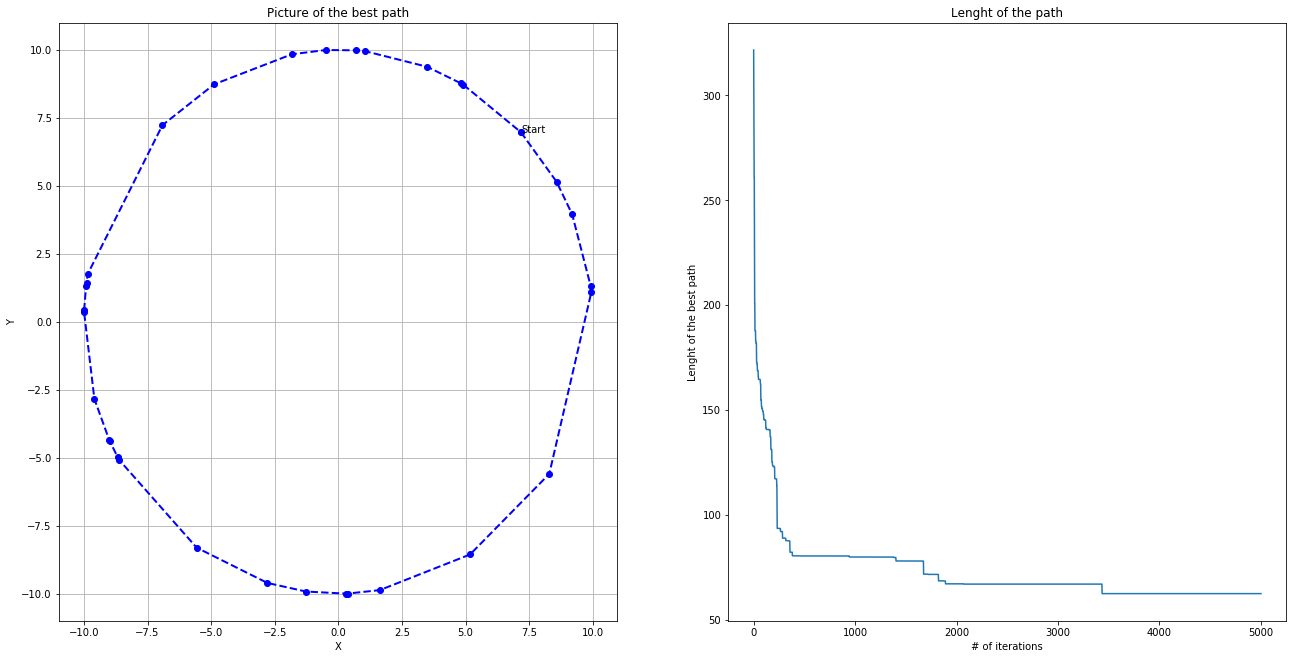

lunghezza del percorso migliore:
62.403


In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Coord = np.loadtxt('data/CircumferencePath.dat').T
costo = np.loadtxt('data/Lenght_of_the_best_path.dat')
iters = np.arange(5000)

plt.figure(figsize=[22,11])
plt.subplot(1,2,1)
plt.plot(Coord[0], Coord[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (Coord[0][0],Coord[1][0]))
plt.title('Picture of the best path')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(1,2,2)
plt.plot(iters + 1,costo)
plt.title('Lenght of the path')
plt.xlabel('# of iterations')
plt.ylabel('Lenght of the best path')
plt.show()

print("lunghezza del percorso migliore:")
print(costo[4999])

### Risultati nel quadrato:

##### DIsegno del cammino migliore in funzione del numero di iterazioni dell'algoritmo

Dopo poco più di 2000 iterazioni l'algoritmo trova una soluzione che porta avanti fino almeno a 10000 iterazioni

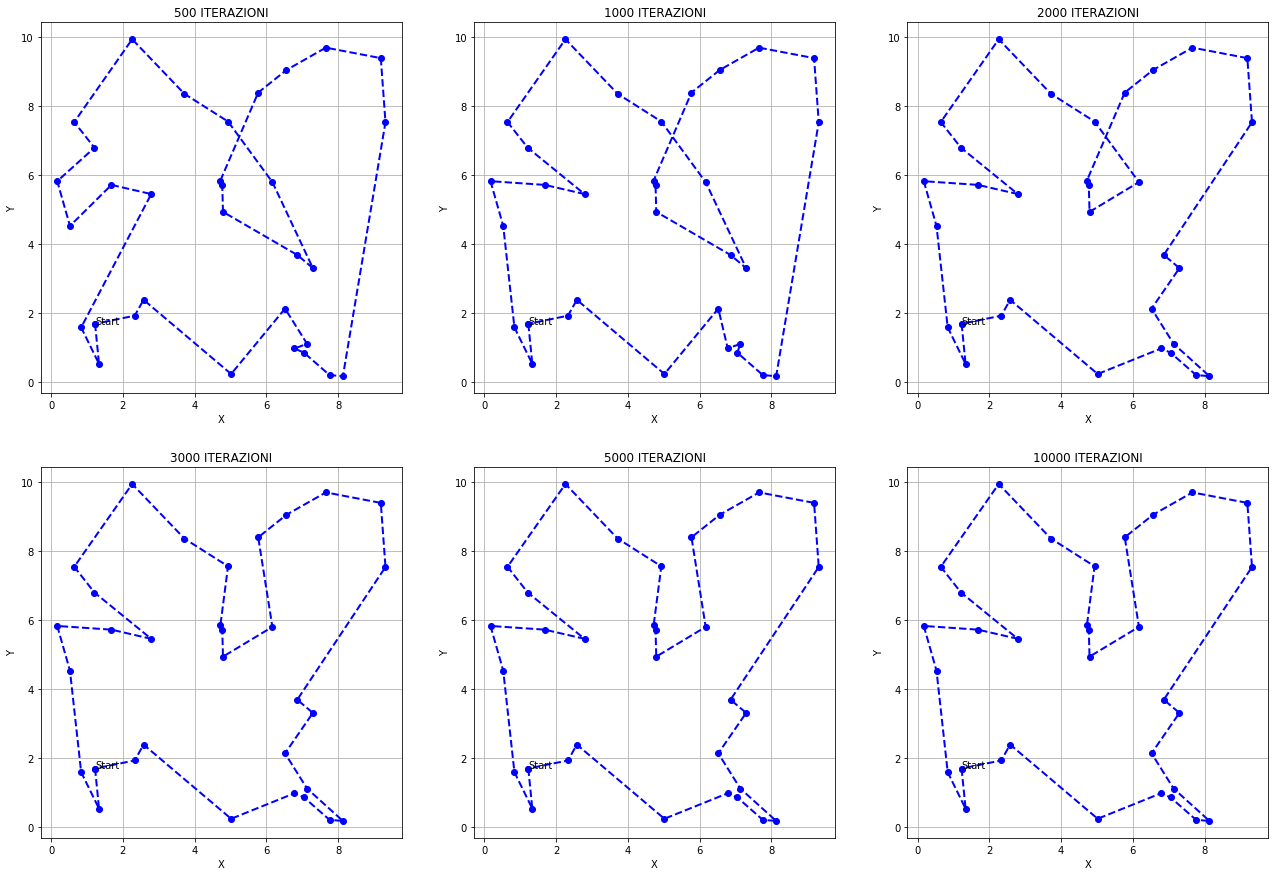

In [13]:
Coord500 = np.loadtxt('dataSquare/SquarePath_500.dat').T
Coord1000 = np.loadtxt('dataSquare/SquarePath_1000.dat').T
Coord2000 = np.loadtxt('dataSquare/SquarePath_2000.dat').T
Coord3000 = np.loadtxt('dataSquare/SquarePath_3000.dat').T
Coord5000 = np.loadtxt('dataSquare/SquarePath_5000.dat').T
Coord10000 = np.loadtxt('dataSquare/SquarePath_10000.dat').T

plt.figure(figsize=[22,15])
plt.subplot(2,3,1)
plt.plot(Coord500[0], Coord500[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (Coord500[0][0],Coord500[1][0]))
plt.title('500 ITERAZIONI')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(2,3,2)
plt.plot(Coord1000[0], Coord1000[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (Coord1000[0][0],Coord1000[1][0]))
plt.title('1000 ITERAZIONI')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(2,3,3)
plt.plot(Coord2000[0], Coord2000[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (Coord2000[0][0],Coord2000[1][0]))
plt.title('2000 ITERAZIONI')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(2,3,4)
plt.plot(Coord3000[0], Coord3000[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (Coord3000[0][0],Coord3000[1][0]))
plt.title('3000 ITERAZIONI')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(2,3,5)
plt.plot(Coord5000[0], Coord5000[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (Coord5000[0][0],Coord5000[1][0]))
plt.title('5000 ITERAZIONI')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(2,3,6)
plt.plot(Coord10000[0], Coord10000[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (Coord10000[0][0],Coord10000[1][0]))
plt.title('10000 ITERAZIONI')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

### Andamento della lunghezza del cammino in funzione del numero di iterazioni

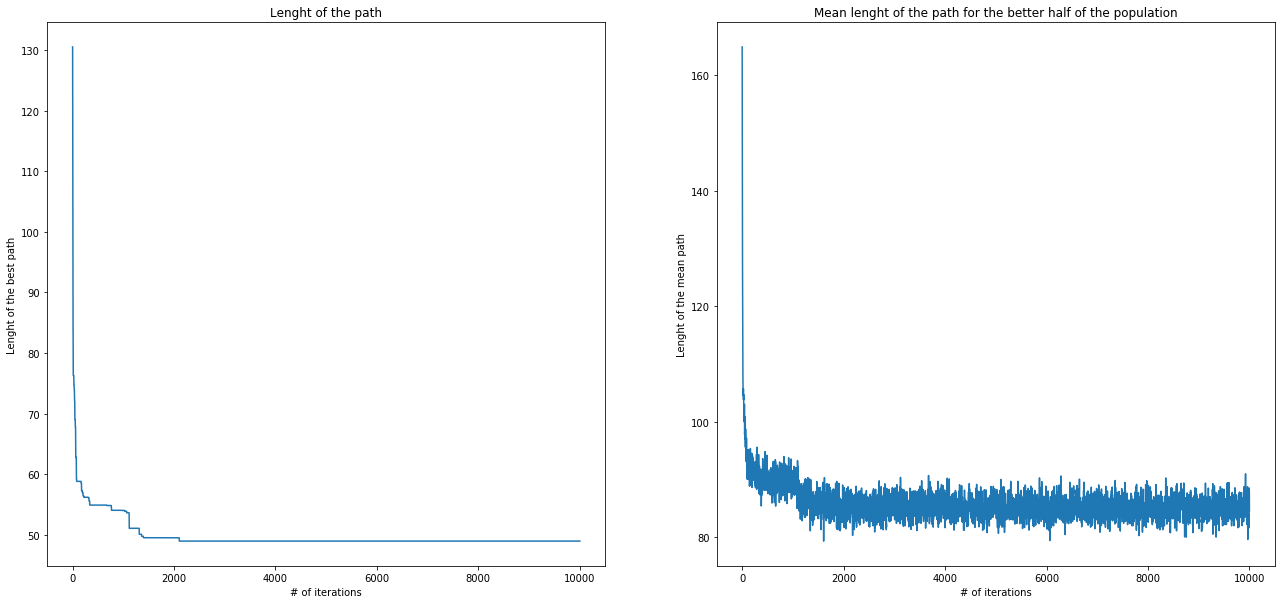

lunghezza del cammino con 500 iterazioni =  54.919
lunghezza del cammino con 1000 iterazioni =  54.0313
lunghezza del cammino con 2000 iterazioni =  49.5371
lunghezza del cammino con 3000 iterazioni =  48.9797
lunghezza del cammino con 5000 iterazioni =  48.9797
lunghezza del cammino con 10000 iterazioni =  48.9797


In [19]:
costo2 = np.loadtxt('dataSquare/Lenght_of_the_best_path.dat')
meancost = np.loadtxt('dataSquare/Mean_Path_half_population.dat')
iters2 = np.arange(10000)

plt.figure(figsize=[22,10])
plt.subplot(1,2,1)
plt.plot(iters2 + 1, costo2)
plt.title('Lenght of the path')
plt.xlabel('# of iterations')
plt.ylabel('Lenght of the best path')
plt.subplot(1,2,2)
plt.plot(iters2 + 1, meancost)
plt.title('Mean lenght of the path for the better half of the population')
plt.xlabel('# of iterations')
plt.ylabel('Lenght of the mean path')
plt.show()

print('lunghezza del cammino con 500 iterazioni = ',costo2[499])
print('lunghezza del cammino con 1000 iterazioni = ',costo2[999])
print('lunghezza del cammino con 2000 iterazioni = ',costo2[1999])
print('lunghezza del cammino con 3000 iterazioni = ',costo2[2999])
print('lunghezza del cammino con 5000 iterazioni = ',costo2[4999])
print('lunghezza del cammino con 10000 iterazioni = ',costo2[9999])